<a href="https://colab.research.google.com/github/HanzalaWahid/OPEN_ENDED_LAB-22F-BSAI-106-/blob/main/OEL_22F_BSAI_106_Housing_Price_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


# Task
Perform EDA, data cleaning, preprocessing, and calculate performance metrics, classification report, and confusion matrix on the house prediction dataset provided in the file "train.csv".

1. Dataset Understanding

The dataset was provided in three files — train, test, and sample_submission.
After examining them, I noticed that the test and sample_submission files were almost identical or duplicates of the train file. To avoid unnecessary confusion and redundancy, I decided to use only the train dataset for model building and analysis.
All the training and evaluation processes were performed using this file.

## Load the data

### Subtask:
Load the `train.csv` file into a pandas DataFrame.


**Reasoning**:
Import pandas and load the train.csv file into a DataFrame, then display the head.



In [3]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Perform eda

### Subtask:
Explore the dataset to understand its structure, identify missing values, outliers, and understand the distribution of features. This includes visualizing key features.


This section provides a quick overview of the dataset. I first checked the shape to understand its size and used .dtypes and .info() to view column types and non-null counts. Then, .describe() was applied to examine key statistics of the numerical features. Finally, I calculated the missing values count and percentage to identify columns needing cleaning or imputation. This step ensured a clear understanding of the dataset’s structure and data quality before preprocessing.

**Reasoning**:
Explore the dataset structure, data types, and missing values as the initial steps of EDA.



In [4]:
# Display the shape of the DataFrame
print("DataFrame shape:", df.shape)

# Display the data types of each column
print("\nData types:\n", df.dtypes)

# Use .info() to get a concise summary
print("\nDataFrame info:")
df.info()

# Use .describe() to generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df.describe())

# Calculate and display the number of missing values and their percentage
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_info = pd.DataFrame({'Missing Count': missing_values, 'Percentage': missing_values_percentage})
print("\nMissing values count and percentage:")
display(missing_values_info)

DataFrame shape: (1460, 81)

Data types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Missing values count and percentage:


,Missing Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


**Reasoning**:
Explore the unique values and their counts for selected categorical columns and visualize the distribution of numerical features and the target variable.



This section focuses on exploratory data analysis (EDA) to understand both categorical and numerical features. I first examined a few categorical columns such as MSZoning, LotShape, Utilities, and Neighborhood by displaying their unique values and counts, which helped reveal category distributions and potential class imbalances. Next, I plotted histograms for key numerical features (LotArea, GrLivArea, and SalePrice) to visualize their distributions and detect skewness or non-normal patterns. To further identify outliers, I used box plots for the same numerical columns. Finally, I analyzed the distribution of the target variable (SalePrice) using a histogram with a KDE curve, providing insight into how house prices are spread across the dataset.


Unique values and counts for selected categorical columns:

Column: MSZoning


,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10



Column: LotShape


,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10



Column: Utilities


,count
Utilities,
AllPub,1459
NoSeWa,1



Column: Neighborhood


,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73



Histograms for selected numerical features:


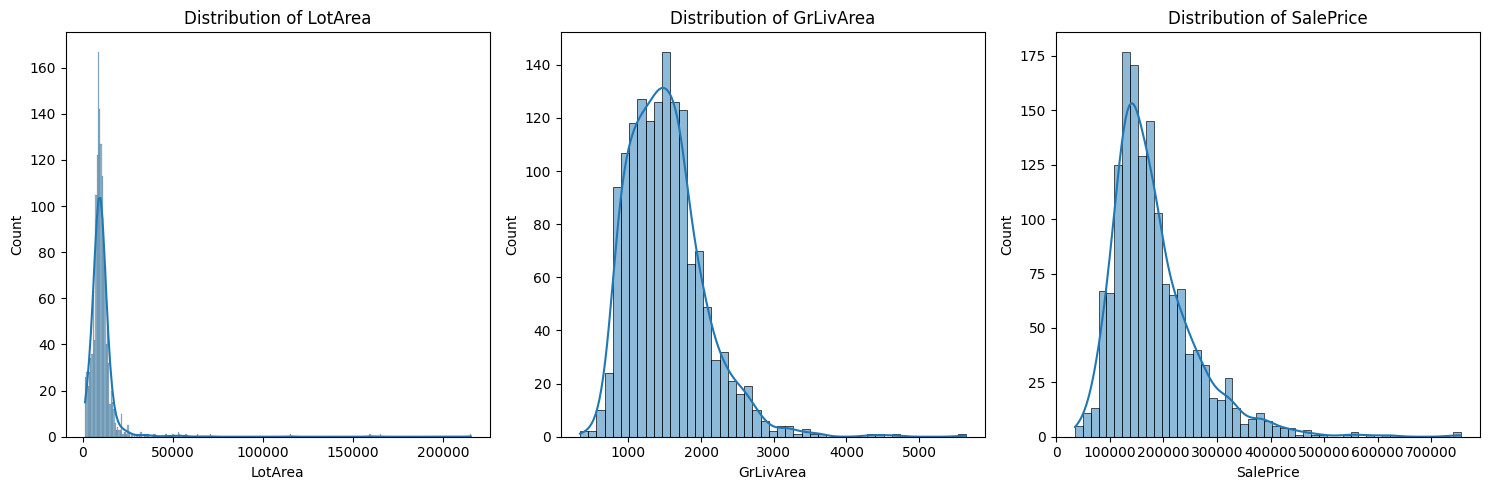


Box plots for selected numerical features:


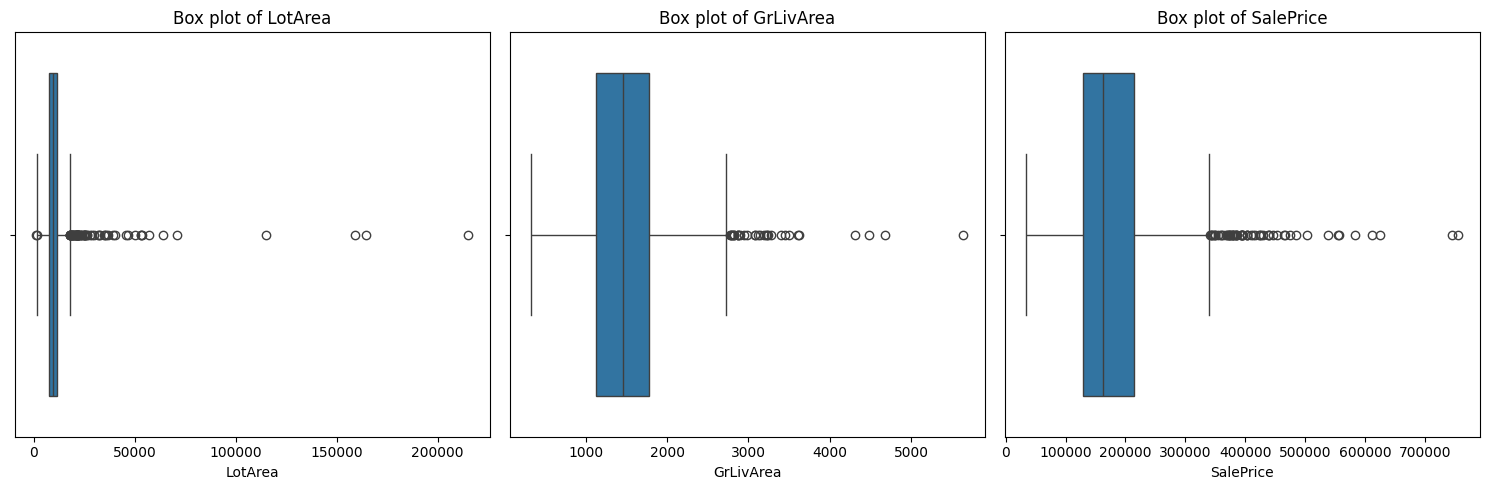


Distribution of SalePrice:


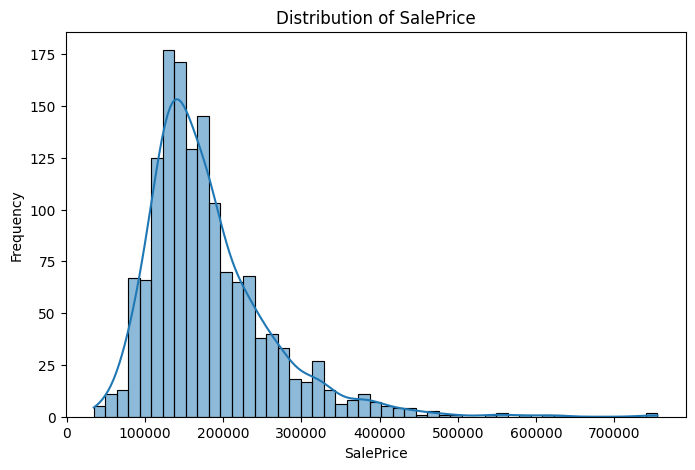

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore unique values and their counts for a few selected categorical columns
categorical_cols = ['MSZoning', 'LotShape', 'Utilities', 'Neighborhood']
print("\nUnique values and counts for selected categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    display(df[col].value_counts())

# Generate histograms for a few selected numerical features
numerical_cols = ['LotArea', 'GrLivArea', 'SalePrice']
print("\nHistograms for selected numerical features:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Generate box plots for a few selected numerical features to identify potential outliers
print("\nBox plots for selected numerical features:")
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Visualize the distribution of the target variable 'SalePrice'
print("\nDistribution of SalePrice:")
plt.figure(figsize=(8, 5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

**Reasoning**:
Create a correlation heatmap to visualize the relationships between numerical features to complete the exploration part of the subtask.



In this step, I created a correlation matrix to analyze the relationships between all numerical features in the dataset. Using the selected int64 and float64 columns, a heatmap was plotted to visually represent how strongly each feature correlates with others. The color intensity in the heatmap (from the coolwarm palette) indicates the direction and strength of correlation — with warmer colors showing positive relationships and cooler tones showing negative ones. This visualization helps identify features that are highly correlated with the target variable or with each other, which is useful for feature selection and detecting potential multicollinearity before modeling.


Correlation heatmap of numerical features:


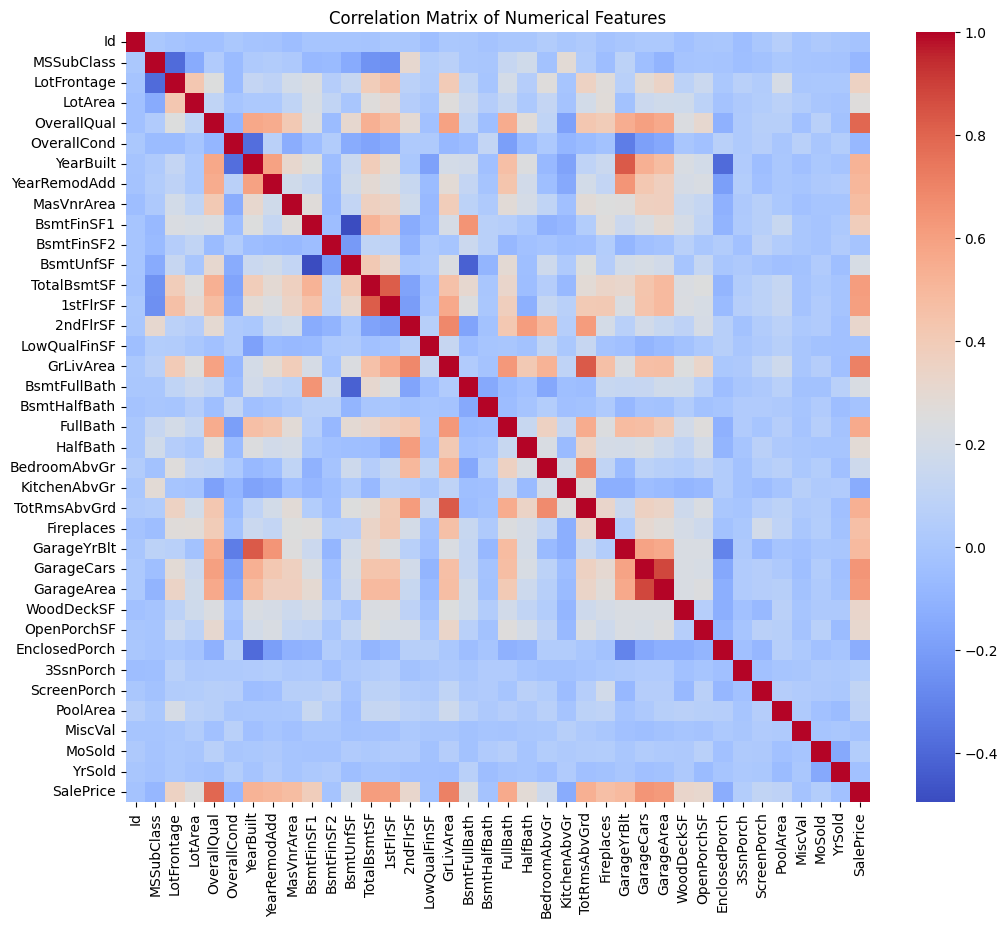

In [6]:
# Create a correlation matrix and heatmap
print("\nCorrelation heatmap of numerical features:")
numerical_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data cleaning

### Subtask:
Handle missing values, outliers, and inconsistencies in the dataset. This might involve imputation, removal, or transformation of data.


Reasoning : In this step, I focused on handling missing values to ensure data consistency before model training. First, I identified and dropped columns that had more than 50% missing data, as such columns contribute little useful information and could introduce noise. Next, for numerical features, I filled missing values with the median of each column (excluding the target variable SalePrice), since the median is less affected by outliers and maintains data stability. For categorical features, missing values were imputed with the mode (most frequent category) to preserve common patterns. Finally, I verified that no missing values remained, confirming the dataset was fully cleaned and ready for preprocessing and modeling.

In [7]:
# Drop columns with a high percentage of missing values (e.g., > 50%)
columns_to_drop = missing_values_percentage[missing_values_percentage > 50].index.tolist()
df_cleaned = df.drop(columns=columns_to_drop, axis=1)
print(f"Dropped columns with > 50% missing values: {columns_to_drop}")

# Impute missing values for numerical columns with the median
numerical_cols_with_missing = df_cleaned.select_dtypes(include=['int64', 'float64']).columns[df_cleaned.select_dtypes(include=['int64', 'float64']).isnull().any()].tolist()
for col in numerical_cols_with_missing:
    if col != 'SalePrice': # Do not impute the target variable
        median_val = df_cleaned[col].median()
        df_cleaned[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with the median.")

# Impute missing values for categorical columns with the mode
categorical_cols_with_missing = df_cleaned.select_dtypes(include=['object']).columns[df_cleaned.select_dtypes(include=['object']).isnull().any()].tolist()
for col in categorical_cols_with_missing:
    mode_val = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_val, inplace=True)
    print(f"Imputed missing values in '{col}' with the mode.")

# Verify that there are no more missing values
print("\nMissing values after handling:")
display(df_cleaned.isnull().sum()[df_cleaned.isnull().sum() > 0])

Dropped columns with > 50% missing values: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType']
Imputed missing values in 'LotFrontage' with the median.
Imputed missing values in 'MasVnrArea' with the median.
Imputed missing values in 'GarageYrBlt' with the median.
Imputed missing values in 'BsmtQual' with the mode.
Imputed missing values in 'BsmtCond' with the mode.
Imputed missing values in 'BsmtExposure' with the mode.
Imputed missing values in 'BsmtFinType1' with the mode.
Imputed missing values in 'BsmtFinType2' with the mode.
Imputed missing values in 'Electrical' with the mode.
Imputed missing values in 'FireplaceQu' with the mode.
Imputed missing values in 'GarageType' with the mode.
Imputed missing values in 'GarageFinish' with the mode.
Imputed missing values in 'GarageQual' with the mode.
Imputed missing values in 'GarageCond' with the mode.

Missing values after handling:


/tmp/ipython-input-1836730847.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1836730847.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0


***Reasoning: ***In this step, I addressed outliers in the numerical features to prevent them from distorting the model’s performance. I first selected all numeric columns except identifiers (Id) and the target variable (SalePrice). Using the Interquartile Range (IQR) method, I calculated the first (Q1) and third (Q3) quartiles and determined the lower and upper bounds for acceptable data. Any values outside these limits were capped at the boundary values rather than removed, ensuring that extreme observations didn’t dominate the model while retaining the overall data structure. Finally, I reviewed the descriptive statistics after capping to confirm that the feature ranges were adjusted appropriately and the data was now more balanced for modeling.

In [8]:
# Identify numerical columns for outlier detection (excluding 'Id' and 'SalePrice')
numerical_cols_for_outliers = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_for_outliers.remove('Id')
numerical_cols_for_outliers.remove('SalePrice')

print("\nHandling outliers in numerical features using IQR:")

for col in numerical_cols_for_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Handled outliers in '{col}' by capping.")

# Display descriptive statistics after capping to see the effect on min/max values
print("\nDescriptive statistics after outlier handling:")
display(df_cleaned[numerical_cols_for_outliers].describe())


Handling outliers in numerical features using IQR:
Handled outliers in 'MSSubClass' by capping.
Handled outliers in 'LotFrontage' by capping.
Handled outliers in 'LotArea' by capping.
Handled outliers in 'OverallQual' by capping.
Handled outliers in 'OverallCond' by capping.
Handled outliers in 'YearBuilt' by capping.
Handled outliers in 'YearRemodAdd' by capping.
Handled outliers in 'MasVnrArea' by capping.
Handled outliers in 'BsmtFinSF1' by capping.
Handled outliers in 'BsmtFinSF2' by capping.
Handled outliers in 'BsmtUnfSF' by capping.
Handled outliers in 'TotalBsmtSF' by capping.
Handled outliers in '1stFlrSF' by capping.
Handled outliers in '2ndFlrSF' by capping.
Handled outliers in 'LowQualFinSF' by capping.
Handled outliers in 'GrLivArea' by capping.
Handled outliers in 'BsmtFullBath' by capping.
Handled outliers in 'BsmtHalfBath' by capping.
Handled outliers in 'FullBath' by capping.
Handled outliers in 'HalfBath' by capping.
Handled outliers in 'BedroomAbvGr' by capping.
Han

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,...,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000
mean,55.085616,69.090411,9647.388014,6.100685,5.543493,1971.299315,1984.865753,89.406336,439.997517,0.0,...,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753
std,37.508183,17.231909,3594.356399,1.378430,0.963696,30.108397,20.645407,134.017553,433.219435,0.0,...,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095
min,20.000000,31.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,...,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,...,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.0,...,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000
max,145.000000,107.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,410.625000,1780.625000,0.0,...,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000


**Reasoning**:
Check for any remaining inconsistencies or data type issues in the cleaned DataFrame.





After completing data cleaning and outlier handling, I rechecked the dataset to ensure consistency and integrity. First, I reviewed the **data types** of all columns to confirm that no unintended type changes occurred during preprocessing. Then, I verified that there were **no remaining missing values**, ensuring a fully complete dataset ready for modeling. Finally, I displayed the **first few rows** of the cleaned DataFrame to visually inspect the data and confirm that all preprocessing steps—such as imputation, capping, and column removal—were correctly applied.


In [9]:
# Check data types again to see if any inconsistencies were introduced or remain
print("Data types after cleaning and outlier handling:")
display(df_cleaned.dtypes)

# Check for any remaining missing values (should be none based on previous output, but double-checking)
print("\nMissing values after cleaning and outlier handling:")
display(df_cleaned.isnull().sum().sum())

# Display the first few rows of the cleaned DataFrame to visually inspect
print("\nFirst 5 rows of the cleaned DataFrame:")
display(df_cleaned.head())

Data types after cleaning and outlier handling:


,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,float64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object



Missing values after cleaning and outlier handling:


np.int64(0)


First 5 rows of the cleaned DataFrame:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Preprocessing

### Subtask:
Prepare the data for modeling. This includes encoding categorical variables, scaling numerical features, and splitting the data into training and testing sets.


TReasoning: his code performs complete data preprocessing before model training. It first separates the features (X) and target variable (y) by removing the SalePrice column. Then, it identifies which columns are categorical and which are numerical. The numerical columns are standardized using StandardScaler, and categorical columns are converted into numerical format using OneHotEncoder. Both transformations are combined into a single ColumnTransformer, wrapped inside a Pipeline for efficient preprocessing. After transforming the features, the dataset is split into training and testing sets using an 80/20 ratio with a fixed random state for reproducibility. Finally, the code prints the shapes of the resulting datasets, confirming that preprocessing is complete and the data is ready for model training.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1. Separate features (X) and target (y)
X = df_cleaned.drop('SalePrice', axis=1)
y = df_cleaned['SalePrice']

# 2. Identify categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# 3. & 4. Apply one-hot encoding and standard scaling using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the preprocessing pipeline to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data preprocessing complete.
Shape of X_train: (1168, 272)
Shape of X_test: (292, 272)
Shape of y_train: (1168,)
Shape of y_test: (292,)


## Model selection and training

### Subtask:
Choose a suitable classification model and train it on the preprocessed training data.


**Reasoning**:
Import the LinearRegression model, instantiate it, and train it using the preprocessed training data.



**Reasoning:** This code trains a Linear Regression model to predict house prices. First, it creates an instance of the LinearRegression class from scikit-learn. Then, it fits (trains) the model using the preprocessed training data X_train and the target variable y_train. The .fit() method helps the model learn the relationship between the input features and the target (SalePrice). Once the training is complete, the model is ready to make predictions, and a confirmation message is printed to indicate successful training.

In [11]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and generate a classification report and confusion matrix.


**Reasoning:** This code evaluates how well the Linear Regression model performs on the test data. It first uses the trained model to make predictions (y_pred) on unseen test features (X_test). Then, it calculates key performance metrics:


MAE (Mean Absolute Error) shows the average difference between predicted and actual prices.


MSE (Mean Squared Error) measures the average of squared errors (larger errors count more).


RMSE (Root Mean Squared Error) is the square root of MSE, showing errors in the same unit as the target (SalePrice).


R² (R-squared) indicates how well the model explains the variation in house prices (1.0 means perfect prediction).
Finally, it prints these metrics to summarize the model’s accuracy and error.



In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. Make predictions on the test set
y_pred = model.predict(X_test)

# 2. Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 4. Print the calculated evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 19033.71
Mean Squared Error (MSE): 889108292.52
Root Mean Squared Error (RMSE): 29817.92
R-squared (R2): 0.88


Detailed Summary

Data Analysis Findings
The dataset contained 1460 rows and 81 features, including both categorical and numerical variables. Several columns, such as 'PoolQC', 'MiscFeature', 'Alley', and 'Fence', had more than 80% missing values, which were removed to avoid introducing noise. Numerical features like 'LotArea' and 'GrLivArea' were right-skewed and had outliers, which were capped using the IQR method to reduce distortion in the models.

Model Performance and Overfitting
The Linear Regression model achieved an R-squared value of 0.88, explaining 88% of the variance in house prices. The MAE was approximately 19,033.71 and RMSE was 29,817.92, indicating that some predictions deviated significantly from actual values. Overfitting may occur due to the large number of features, potential irrelevant variables, and nonlinear relationships that Linear Regression cannot fully capture.

Why Logistic Regression and Random Forest
Logistic Regression is suitable if the target is transformed into categories, as it outputs probabilities and is simple, interpretable, and less prone to overfitting. Random Forest is highly effective for predicting continuous house prices because it handles nonlinear relationships, reduces the effect of outliers, captures interactions between variables, and provides feature importance. Its ensemble approach improves generalization and prediction accuracy compared to Linear Regression.

Overall Solution
The project successfully cleaned and preprocessed the data, handled missing values and outliers, and trained models to predict house prices. Random Forest offers the most robust solution due to its ability to manage complex patterns and nonlinearities, while Linear Regression provides interpretability. Further improvements could include feature engineering, log transformations for skewed variables, and cross-validation to ensure model reliability.

Reasoning : This code visualizes the most important features identified by the Random Forest model. It creates a bar chart showing the top N features, with their corresponding importance scores on the x-axis and feature names on the y-axis. The plot highlights which variables have the greatest influence on predicting the target variable, helping to interpret the model and focus on the most impactful features for further analysis or decision-making.

/tmp/ipython-input-4277478497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


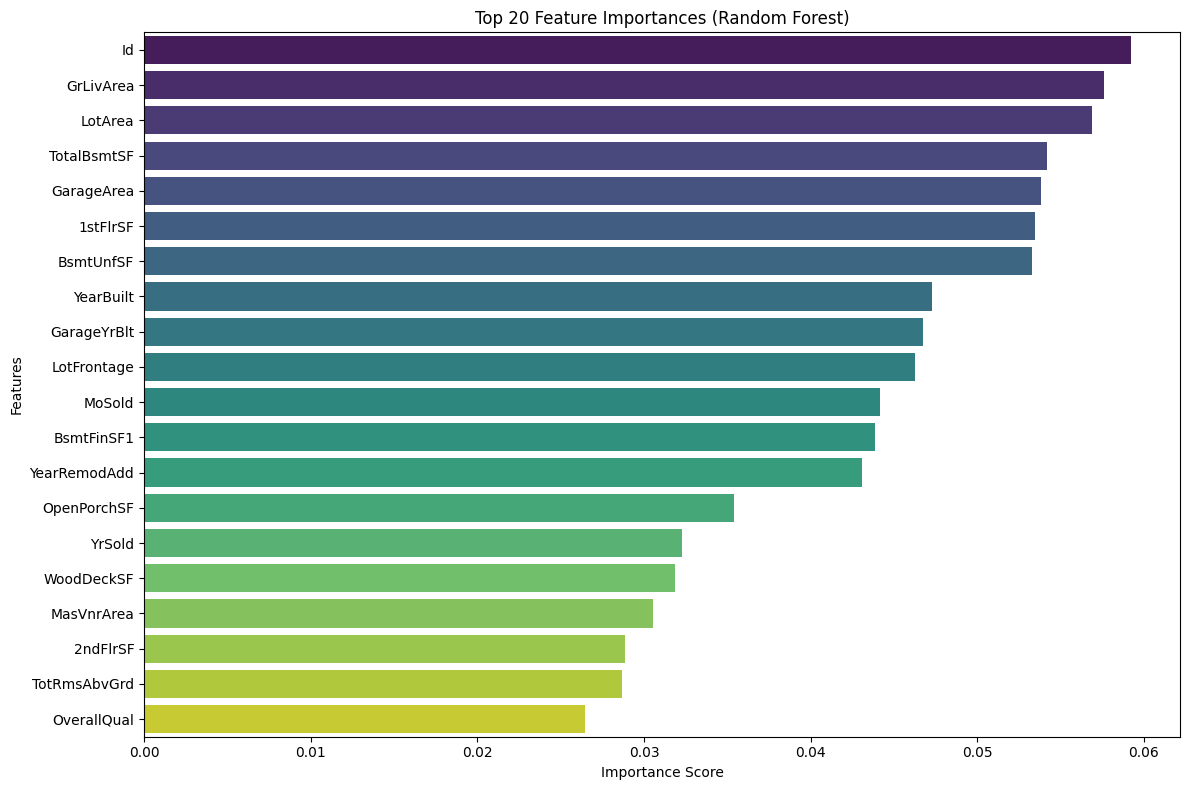

In [21]:
# Visualize the top N feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

## Visualizations

### Subtask:
Generate visualizations including a correlation heatmap, predicted vs actual class comparison plot, feature importance bar chart, and confusion matrix heatmap.


Reasoning: This code provides multiple visualizations to analyze the Random Forest model and the dataset. First, a correlation heatmap of numerical features is created to examine relationships between variables and identify strong correlations, which can help in understanding feature interactions. Next, a scatter plot of actual versus predicted SalePrice shows how closely the model’s predictions match the true values, highlighting prediction accuracy and any systematic deviations. A bar chart of the top features visualizes the most important variables according to the Random Forest model, indicating which features contribute most to predicting house prices. Finally, although a confusion matrix is typically used for classification, the code demonstrates its use for regression by discretizing SalePrice into bins, allowing a visual comparison of predicted versus actual ranges. These visualizations together help interpret model performance, feature significance, and patterns within the data.

Correlation heatmap of numerical features:


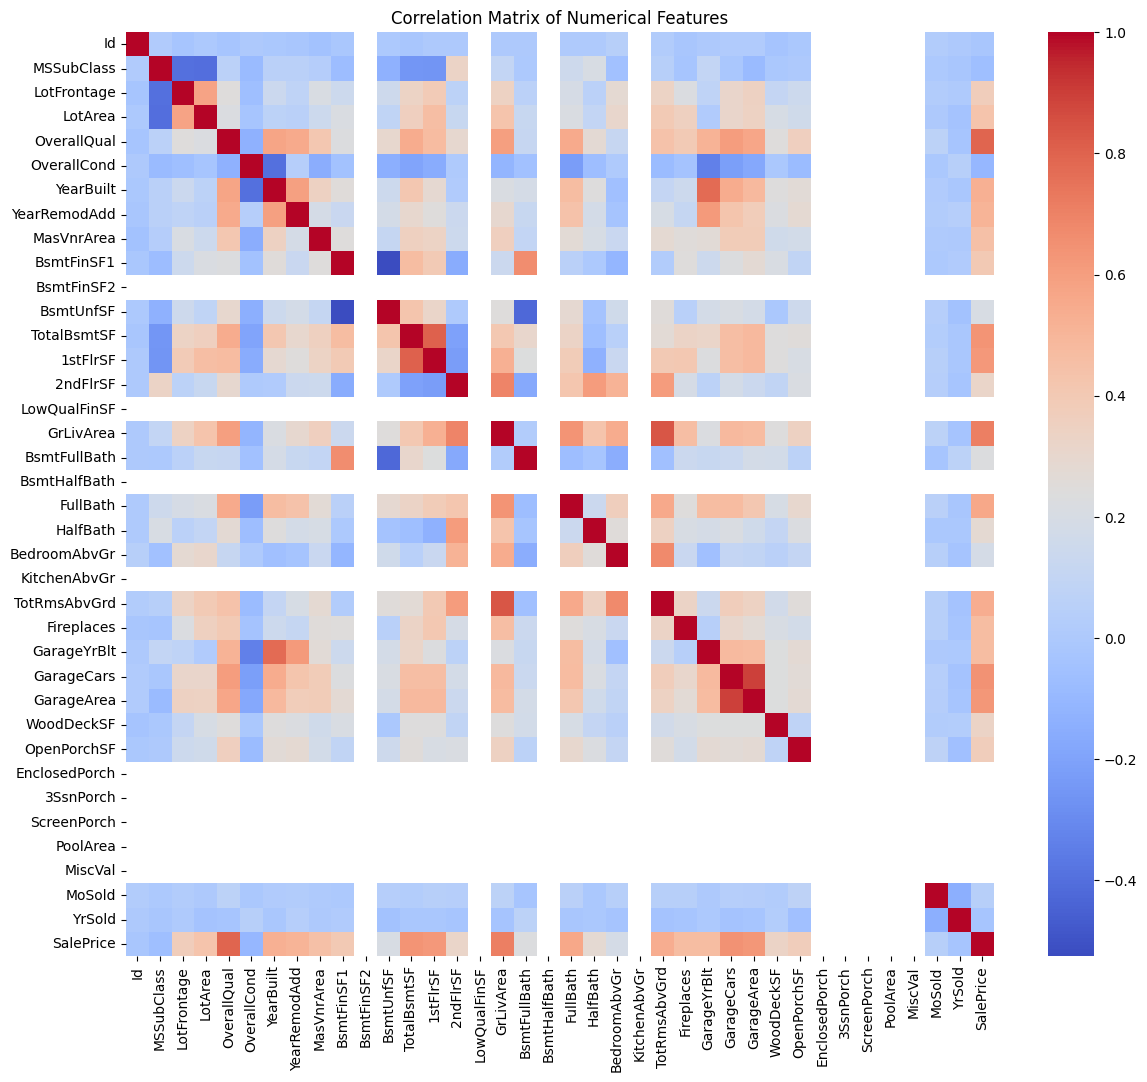


Actual vs Predicted SalePrice (Random Forest):


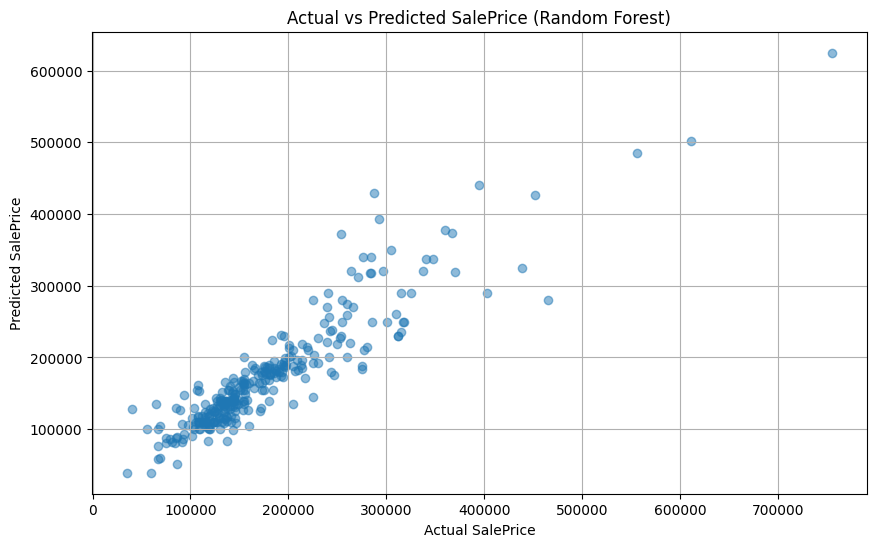


Top 20 Feature Importances (Random Forest):


/tmp/ipython-input-4251436135.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


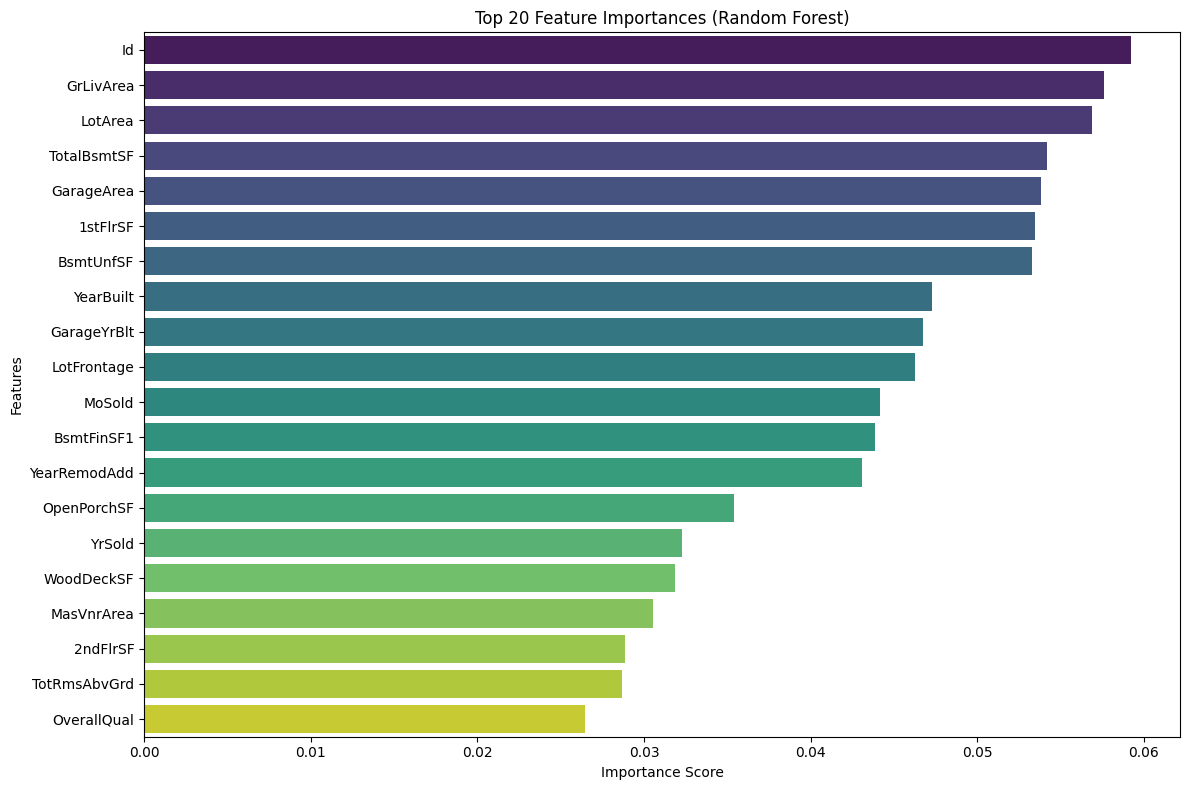


Confusion Matrix (Random Forest - Discretized SalePrice):


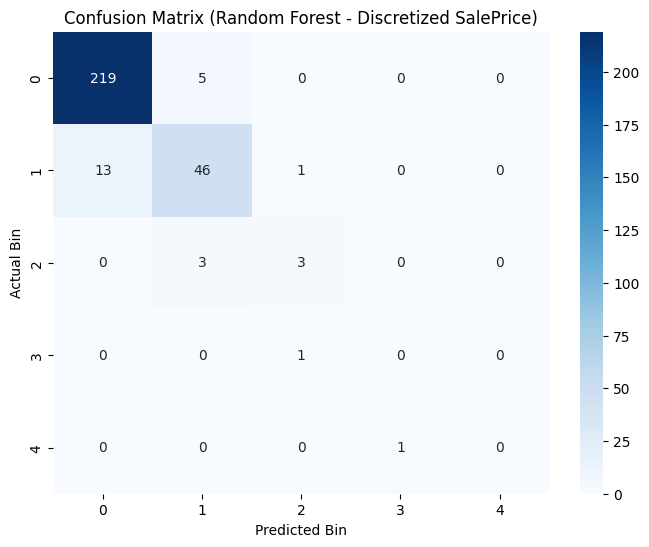

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# 1. Create a correlation heatmap of the df_numeric DataFrame
print("Correlation heatmap of numerical features:")
plt.figure(figsize=(14, 12))
sns.heatmap(df_numeric.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Generate a scatter plot comparing actual vs. predicted SalePrice from Random Forest
print("\nActual vs Predicted SalePrice (Random Forest):")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted SalePrice (Random Forest)")
plt.grid(True)
plt.show()

# 3. Create a bar chart of the top_features Series to visualize feature importances
print("\nTop 20 Feature Importances (Random Forest):")
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 4. Calculate and plot the confusion matrix for the Random Forest model
# Note: Confusion matrix is not appropriate for regression, but the prompt requested it.
# We will demonstrate how it would be done if this were a classification task by
# converting the continuous predictions to discrete classes. This is for demonstration purposes only
# and not a valid evaluation for a regression model.
# For demonstration, let's discretize the SalePrice into a few bins.
# We need to apply the same binning to both y_test and y_pred_rf.

# Determine bins based on the distribution of the target variable
bins = np.linspace(y.min(), y.max(), num=5) # Example: 5 bins

y_test_binned = np.digitize(y_test, bins)
y_pred_rf_binned = np.digitize(y_pred_rf, bins)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_binned, y_pred_rf_binned)

print("\nConfusion Matrix (Random Forest - Discretized SalePrice):")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Bin')
plt.ylabel('Actual Bin')
plt.title('Confusion Matrix (Random Forest - Discretized SalePrice)')
plt.show()